# Example reproducible notebook

This example shows how a Jupyter Notebook can be used to tell a story alongside a data analysis including the steps taken to generate the conclusions. This report can be run by anyone else to generate the same results by sharing the file.

## Example setup

To set the scene, I'm using Markdown chunks that allow me to describe what I'm doing. This works exactly the same as an RMarkdown file. 

This analysis will work on the revered `cars` dataset. Before we do any analysis, let's first look at a snapshot of the data.

In [1]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.46,20.22,1,0,3,1


The above table shows the first few lines of the `mtcars` dataset.

## Analysis method

This is an exploratory analysis so rather than $p$-hacking I am simply going to report some stats and draw a plot. I'm focusing on the number of gears and horsepower of the engine. I'll explore this relationship by assuming it's linear and plotting the joint distribution of the two variables.

### Is `gear` correlated with `hp`?

In [2]:
with(mtcars,cor(hp,gear))

[1] -0.1257

The Pearson correlation is negative, so maybe.

### Visualising the data

In [3]:
library(ggplot2)
theme_set(theme_minimal())

Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

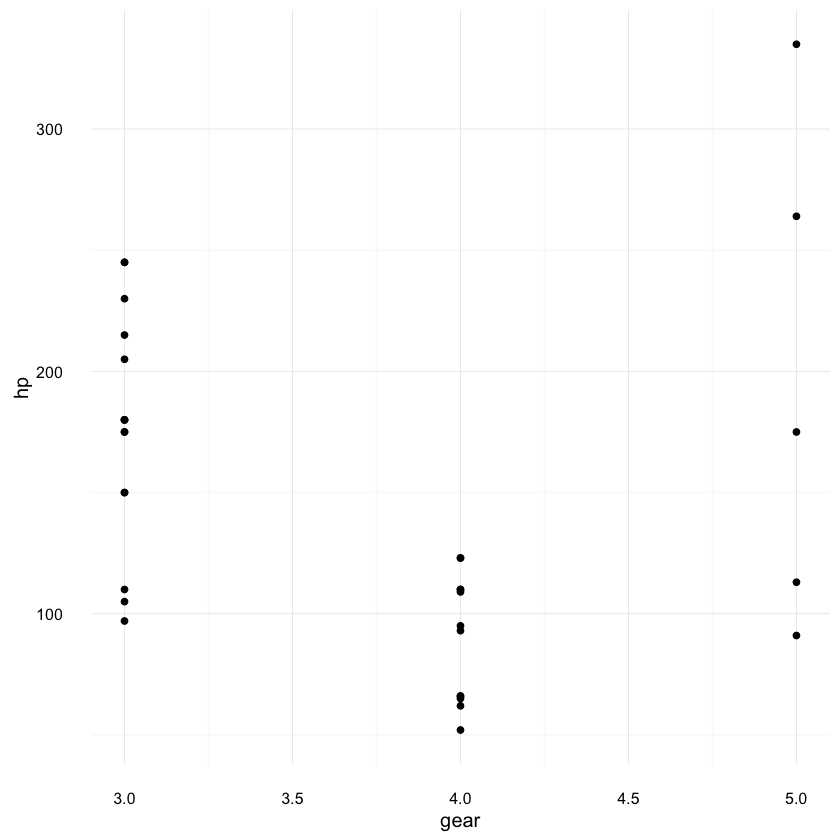

In [4]:
data.plot <- ggplot(mtcars) + aes(gear,hp) + geom_point()
data.plot

On looking at the data, it might not make sense to treat gears as a numeric variable but a categorical one.

### Linear regression

We now fit a linear regression model that predicts the $hp$ given $gear$. Our model will be an instance of the equation $y = \beta_0 + \beta_4 x=4 + \beta_5 x=5$. We will obtain the weights $\beta_0,\beta_4,\beta_5$ using ordinary least squares. We chose this method because it's the default in R.

In [5]:
linear_model <- lm(hp ~ factor(gear), data=mtcars)

In [6]:
summary(linear_model)


Call:
lm(formula = hp ~ factor(gear), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-104.60  -26.13    3.68   30.02  139.40 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      176.1       13.7   12.87  1.6e-13 ***
factor(gear)4    -86.6       20.5   -4.22  0.00022 ***
factor(gear)5     19.5       27.4    0.71  0.48274    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53 on 29 degrees of freedom
Multiple R-squared:  0.441,	Adjusted R-squared:  0.402 
F-statistic: 11.4 on 2 and 29 DF,  p-value: 0.00022


Some of the numbers have 3`*`s, which is probably a good thing?

We now visualise the estimates on the previous plot by adding a new layer containing the coefficients.

In [7]:
coefficients <- data.frame(hp=coef(linear_model),gear=c(3,4,5))
coefficients

,hp,gear
(Intercept),176.13,3
factor(gear)4,-86.633,4
factor(gear)5,19.467,5


Before we can add these to the plot, we need to adjust the non-intercept terms by adding the intercept term.

**Note**: this an example of a bad chunk. If we run this chunk repeatedly, we don't get the same result.

In [8]:
coefficients$hp <- coefficients$hp + c(0,1,1)*(coef(linear_model)[1])
coefficients

,hp,gear
(Intercept),176.13,3
factor(gear)4,89.5,4
factor(gear)5,195.6,5


We can now lay the new points over the previous plot.

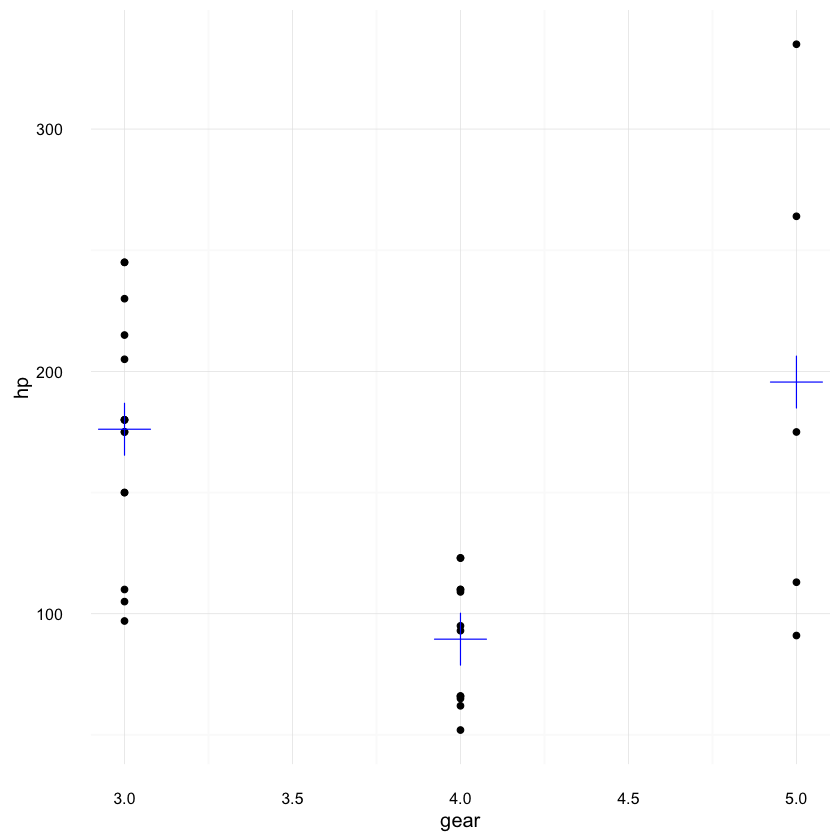

In [9]:
data.plot + geom_point(data=coefficients, colour="blue", shape=3,size=10)

In [10]:
library(superAwesomePackage)

ERROR: Error in library(superAwesomePackage): there is no package called ‘superAwesomePackage’


In [11]:
install.packages("superAwesomePackage")

Warning message:
: unable to access index for repository https://cran.rstudio.com/src/contribWarning message:
: package ‘superAwesomePackage’ is not available (for R version 3.2.2)Warning message:
: unable to access index for repository https://cran.rstudio.com/bin/macosx/mavericks/contrib/3.2

In [12]:
%lsmagic 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: %lsmagic 
    ^
